<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Assignment%202/MB_Assignment2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
MinMaxScaler = MinMaxScaler()
StdScaler = StandardScaler()

In [ ]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Map Y/N variables to binary

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
# Copy housing to a second set
housing_std = housing[:]
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Normalize the first data set (Min Max)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] # variables we want to normalize

housing[num_vars] = MinMaxScaler.fit_transform(housing[num_vars])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,furnished


In [ ]:
# Standardize the second set
housing_std[num_vars] = StdScaler.fit_transform(housing_std[num_vars])
housing_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,furnished
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,furnished
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,semi-furnished
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,furnished
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,furnished


In [ ]:
# Loss calculation function
def Loss_calculator(x_1, x_2, y_1, y_2, theta, iterations, alpha) :
    train_losses = []
    val_losses = []
    m = len(x_1)

    for i in range(iterations) :
        gradients = 2/m * x_1.T.dot(x_1.dot(theta) - y_1)
        theta -= alpha * gradients

        train_loss = (1/m) * np.sum(np.square(x_1.dot(theta) - y_1))
        val_loss = (1/len(x_2)) * np.sum(np.square(x_2.dot(theta) - y_2))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

In [ ]:
## Problem 2a
## Pre-Processing
varlist_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_2a_std = housing_std[varlist_2a]
housing_2a_norm = housing[varlist_2a]
housing_2a_norm.head()

,area,bedrooms,bathrooms,stories,parking
0,0.396564,0.6,0.333333,0.666667,0.666667
1,0.502405,0.6,1.000000,1.000000,1.000000
2,0.571134,0.4,0.333333,0.333333,0.666667
3,0.402062,0.6,0.333333,0.333333,1.000000
4,0.396564,0.6,0.000000,0.333333,0.666667


In [ ]:
# scale with both types
y_housing2a = housing['price']

# Set seed for consistancy
np.random.seed(777)
# Split the sets and y
std_train2a, std_valid2a = train_test_split(housing_2a_std, train_size = 0.8, test_size = 0.2, random_state = 100)
norm_train2a, norm_valid2a = train_test_split(housing_2a_norm, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train2a, y_val2a = train_test_split(y_housing2a, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Training using gradient descent
# initial values
learning_rate = 0.05
iterations = 1500
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
# Add x0 to sets
std_train2a = np.c_[np.ones((len(std_train2a), 1)), std_train2a] # This adds a column of 1's
std_valid2a = np.c_[np.ones((len(std_valid2a), 1)), std_valid2a] # This adds a column of 1's
# Normalization sets
norm_train2a = np.c_[np.ones((len(norm_train2a), 1)), norm_train2a] # This adds a column of 1's
norm_valid2a = np.c_[np.ones((len(norm_valid2a), 1)), norm_valid2a] # This adds a column of 1's
## THIS MUST ONLY RUN ONCE ##

In [ ]:
# Calculate losses for training and validation sets
std_train_losses, std_val_losses = Loss_calculator(std_train2a, std_valid2a, y_train2a, y_val2a, theta, iterations, learning_rate)
norm_train_losses, norm_val_losses = Loss_calculator(norm_train2a, norm_valid2a, y_train2a, y_val2a, theta, iterations, learning_rate)

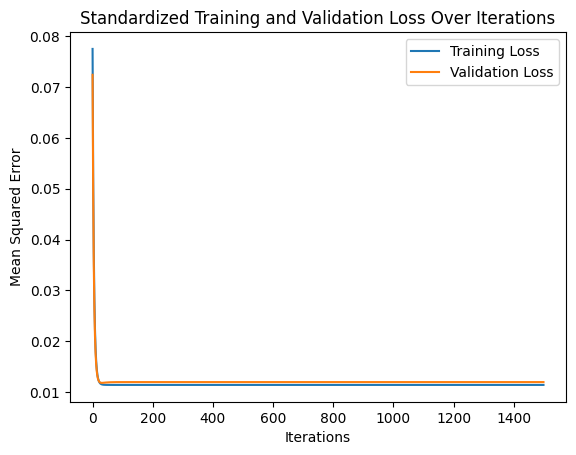

In [ ]:
# Plot training and validation loss
plt.plot(std_train_losses, label="Training Loss")
plt.plot(std_val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Training and Validation Loss Over Iterations")
plt.show()

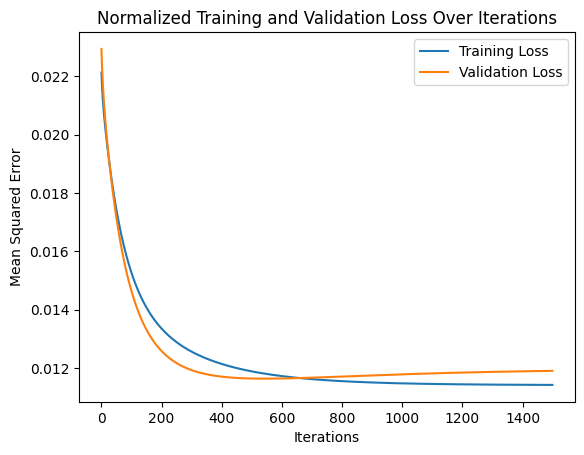

In [ ]:
# Plot training and validation loss
plt.plot(norm_train_losses, label="Training Loss")
plt.plot(norm_val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Training and Validation Loss Over Iterations")
plt.show()

In [ ]:
## Problem 2b
## Pre-Processing
varlist_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
housing_2b_std = housing_std[varlist_2b]
housing_2b_norm = housing[varlist_2b]

In [ ]:
# scale with both Normalization and Standardization
y_housing2b = housing['price']

# Set seed for consistancy
np.random.seed(777)
# Split the sets and y
std_train2b, std_valid2b = train_test_split(housing_2b_std, train_size = 0.8, test_size = 0.2, random_state = 100)
norm_train2b, norm_valid2b = train_test_split(housing_2b_norm, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train2b, y_val2b = train_test_split(y_housing2b, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Training using gradient descent
# initial values
learning_rate = 0.05
iterations = 2000
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Add x0 to sets
std_train2b = np.c_[np.ones((len(std_train2b), 1)), std_train2b] # This adds a column of 1's
std_valid2b = np.c_[np.ones((len(std_valid2b), 1)), std_valid2b] # This adds a column of 1's
# Normalization sets
norm_train2b = np.c_[np.ones((len(norm_train2b), 1)), norm_train2b] # This adds a column of 1's
norm_valid2b = np.c_[np.ones((len(norm_valid2b), 1)), norm_valid2b] # This adds a column of 1's
## THIS MUST ONLY RUN ONCE ##

In [ ]:
# Calculate losses for training and validation sets
std_train_losses, std_val_losses = Loss_calculator(std_train2b, std_valid2b, y_train2b, y_val2b, theta, iterations, learning_rate)
norm_train_losses, norm_val_losses = Loss_calculator(norm_train2b, norm_valid2b, y_train2b, y_val2b, theta, iterations, learning_rate)

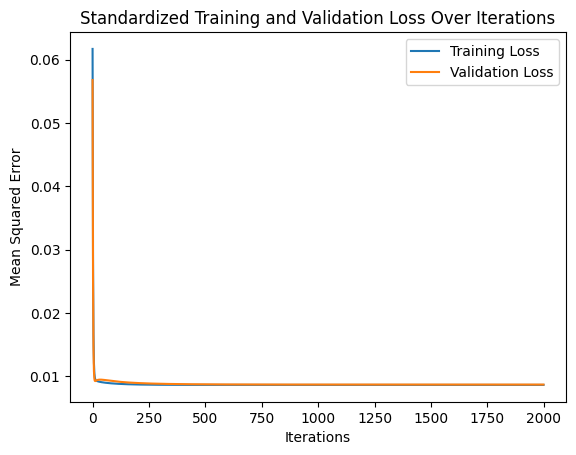

In [ ]:
# Plot training and validation loss
plt.plot(std_train_losses, label="Training Loss")
plt.plot(std_val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Training and Validation Loss Over Iterations")
plt.show()

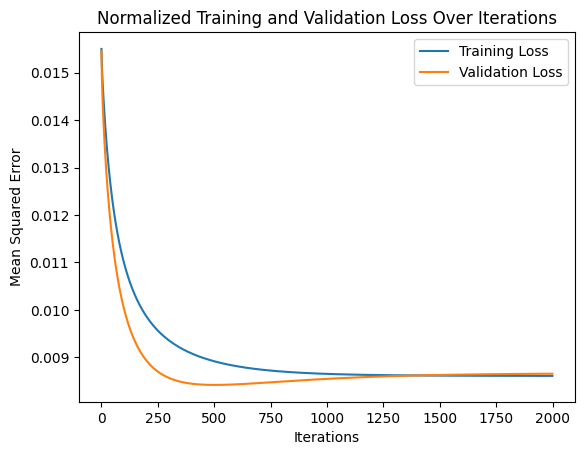

In [ ]:
# Plot training and validation loss
plt.plot(norm_train_losses, label="Training Loss")
plt.plot(norm_val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Training and Validation Loss Over Iterations")
plt.show()